В файле <i>orders</i> представлена информация о заказах в онлайн-магазине.
```
OrderID - ID Заказа,
UserID - ID клиента,
OrderTime - время заказа,
items - список элементов в заказе, каждый элемент описан словарем:
    ItemID  - ID продукта, 
    price - цена единицы товара, 
    quantity - количество единиц товара в заказе
```
В файле <i>categories</i> представлена информация о категории товаров.
```
ItemID - ID продукта,
Category - категория продукта,
ParentCategory - более крупная категория продукта
```

## Анализ логов продуктового магазина

Представьте, что вы работаете аналитиком онлайн-магазина и ваша цель - повысить GMV (суммарную выручку от продажи товаров). Для этого вы хотите провести ряд исследований и придумать какие-то меры для увеличения выручки.

* Визуализируйте динамику продаж напитков в ParentCategory. Есть ли эффект сезонности в продажах?
* Исследуйте и покажите на графике, как отличаются продажи в будние и выходные в категориях 'Сокосодержащие напитки, смузи' и "Печенье"  ?
* Визуализируйте структуру продаж ParentCategory по показателю GMV за один месяц. Укажите категорию с наибольшей долей GMV.
* Исследуйте взаимосвясь между продажами категорий 'Чипсы, снеки, попкорн' и напитками:'Вода', 'Газированные напитки',  'Соки, нектары', 'Лимонады', 'Безалкогольное пиво', 'Вино', 'Пиво'. С чем сильнее коррелируют 'Чипсы, снеки, попкорн'?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io

AttributeError: _ARRAY_API not found

In [3]:
# Для скачивания файлов из репозитория в Colab 
# !wget https://raw.githubusercontent.com/da-python/new-modul-python/main/Lesson4/hometask/data/categories.csv -P data
# !wget https://raw.githubusercontent.com/da-python/new-modul-python/main/Lesson4/hometask/data/orders.json -P data

In [4]:
categories = pd.read_csv('categories.csv')
orders = pd.read_json('orders.json')

In [5]:
categories.head()

,ItemID,Category,ParentCategory
0,1000002,Сладости для диабетиков,Сладости
1,1000046,Вода,Напитки
2,1000048,Сладости для диабетиков,Сладости
3,1000049,Вода,Напитки
4,1000061,Фрукты,Овощи и фрукты


In [6]:
orders.head()

,OrderID,UserID,OrderTime,items,Date
0,90659865,1.609460e+18,2021-01-01 03:51:42,"[{'ItemID': '413736', 'price': 36.72, 'quantit...",2021-01-01
1,90622054,2.499293e+18,2021-01-01 04:13:13,"[{'ItemID': '961454', 'price': 179.9, 'quantit...",2021-01-01
2,90659952,3.945866e+17,2021-01-01 05:48:53,"[{'ItemID': '306553', 'price': 101.9, 'quantit...",2021-01-01
3,89765281,5.412765e+18,2021-01-01 08:33:41,"[{'ItemID': '979703', 'price': 99.9, 'quantity...",2021-01-01
4,90582308,6.380061e+18,2021-01-01 09:55:35,"[{'ItemID': '303765', 'price': 44.9, 'quantity...",2021-01-01


In [7]:
df1 = orders.explode('items')

def extract_values(dictionary):
    ItemID = dictionary['ItemID']
    price = dictionary['price']
    quantity = dictionary['quantity']
    return ItemID, price, quantity


df1[['ItemID', 'price', 'quantity']] = df1['items'].apply(lambda x: pd.Series(extract_values(x)))

df1.drop(columns='items', inplace=True)

In [8]:
df1[['ItemID']] = df1[['ItemID']].apply(pd.to_numeric)
df1['GMV'] = df1['price']*df1['quantity']

In [9]:
df2 = pd.DataFrame()
df2 = df1.merge(categories)

In [10]:
import datetime as dt

df2['Day'] = df2['Date'].dt.day
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year
df2['Weekday_id'] = df2['Date'].dt.weekday
weekdays = {0: 'Понедельник',
           1: 'Вторник',
           2: 'Среда',
           3: 'Четверг',
           4: 'Пятница',
           5: 'Суббота',
           6: 'Воскресенье'}

df2['Weekday'] = df2['Weekday_id'].apply(lambda x: weekdays[x])

In [11]:
df3 = df2[df2['ParentCategory']=='Напитки'].groupby(['Month'])\
                                        .sum('quantity')\
                                        .sort_values(by=['Month'])['quantity']

## 1. В марте продажи напитков выше обычного.

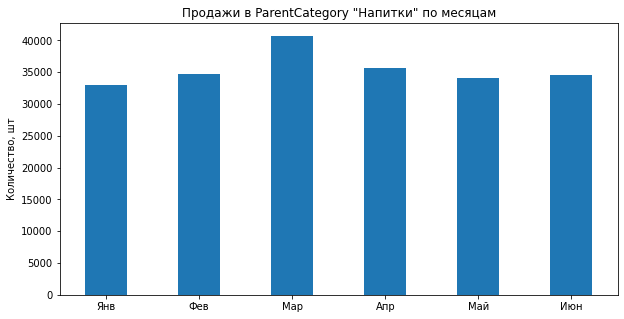

In [12]:
width = 0.45
fig, ax = plt.subplots()

ax.bar(df3.index, df3, width)

fig.set_figwidth(10)
fig.set_figheight(5)
ax.set_ylabel('Количество, шт')
ax.set_xticks(df3.index, ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн'])
ax.set_title('Продажи в ParentCategory "Напитки" по месяцам')

plt.show()

### 2. В выходные в категории "Сокосодержащие напитки, смузи" количество продаж ниже обычного.  В категории "Печенье" не зависит от дня недели.

In [13]:
df4 = df2[df2['Category'].isin(['Сокосодержащие напитки, смузи', 'Печенье'])]\
                        .groupby(['Weekday_id', 'Weekday', 'Category'])\
                        .sum('quantity')\
                        .sort_values(by='Weekday_id')['quantity'].reset_index()

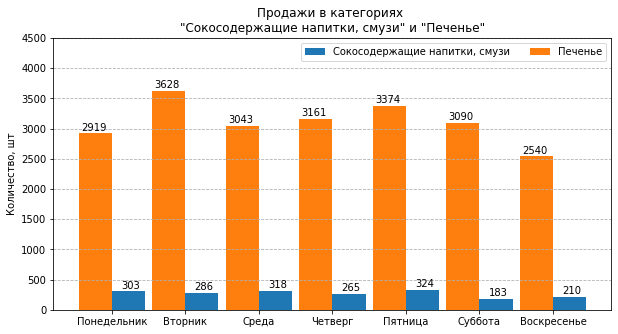

In [14]:
width = 0.45
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(5)

ax.grid(axis='y', linestyle='--')
x = np.arange(7)

ax.bar(x+0.225,\
       df4[df4['Category']=='Сокосодержащие напитки, смузи']['quantity'],\
       width, label='Сокосодержащие напитки, смузи')

ax.bar(x-0.225,\
       df4[df4['Category']=='Печенье']['quantity'],\
       width, label='Печенье')

ax.set_title('Продажи в категориях \n"Сокосодержащие напитки, смузи" и "Печенье"')
ax.legend(loc='upper right', ncols=2)

ax.set_xticks(x, ['Понедельник',
              'Вторник',
              'Среда',
              'Четверг',
              'Пятница',
              'Суббота',
              'Воскресенье'])
ax.set_ylabel('Количество, шт')
ax.set_ylim([0, 4500])


for x, y in enumerate(df4.quantity):
    ax.text(x/2-0.25, y+50, round(y,1), horizontalalignment='center')
    
plt.show()

## 3. Наибольшая доля GMV в категории "Мясо, птица, рыба"

In [15]:
df5 = df2[df2['Month']==3].groupby('ParentCategory').sum('GMV')['GMV'].sort_values(ascending=False)

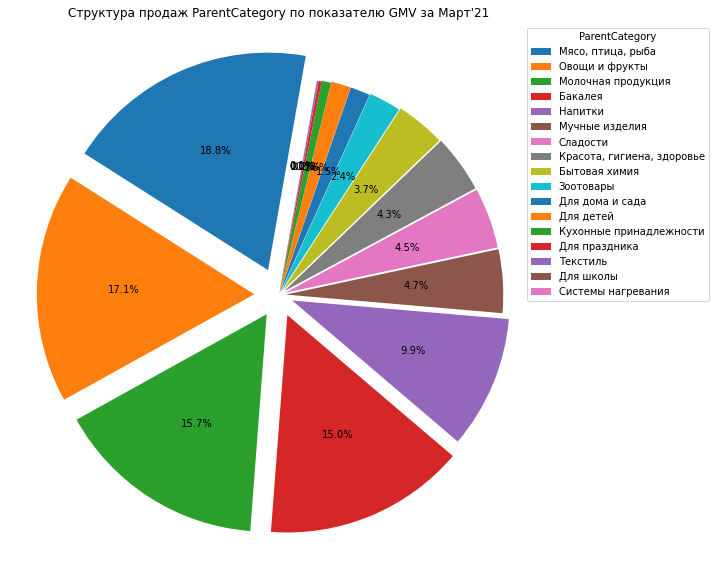

In [16]:
fig, ax = plt.subplots(figsize=(100,10), subplot_kw=dict(aspect='equal'))
explode = (df5/sum(df5))
wedges, texts, autotexts = ax.pie(df5, autopct='%1.1f%%', startangle=80, explode = explode/1.5)

ax.legend(wedges, df5.index, 
          title='ParentCategory', 
          loc='upper right',
         bbox_to_anchor=(1, 0, 0.3, 1))

plt.setp(autotexts, size=10)
ax.set_title("Структура продаж ParentCategory по показателю GMV за Март'21" )

plt.show()

#### Исследуйте взаимосвясь между продажами категорий 'Чипсы, снеки, попкорн' и напитками:'Вода', 'Газированные напитки', 'Соки, нектары', 'Лимонады', 'Безалкогольное пиво', 'Вино', 'Пиво'. С чем сильнее коррелируют 'Чипсы, снеки, попкорн'?

In [17]:
## Подтягиваем Category и ParentCategory в items

for i in range(len(orders['items'])):
    for j in range(len(orders['items'][i])):
        orders['items'][i][j]['Category'] = categories[categories['ItemID']==int(orders['items'][i][j]['ItemID'])]['Category'].iloc[0]
        orders['items'][i][j]['ParentCategory'] = categories[categories['ItemID']==int(orders['items'][i][j]['ItemID'])]['ParentCategory'].iloc[0]


In [26]:
##Собираем корзины в которых присутствует категория 'Чипсы, снеки, попкорн'
orders_lst = []
cnt = 0
for i in orders['items']:
    for j in i:
        if j['Category'] == 'Чипсы, снеки, попкорн':
            cnt += 1
            orders_lst.append(i)
            break
    
print(cnt)

238


In [46]:
def cnt_category(cat):
    #Функция подсчета кол-ва позиций в категории
    cnt = 0
    for i in orders_lst:
        for j in i:
            if j['Category'] == cat:
                cnt += 1
    return cnt


#Считаем сколько позиций в корзинах с 'Чипсами, снеками, попкорном' по каждой категории
category_lst = ['Вода', 'Газированные напитки', 'Соки, нектары', 'Лимонады', 'Безалкогольное пиво', 'Вино', 'Пиво']
ser_cor = []
for i in category_lst:
    ser_cor.append(cnt_category(i))

ser = pd.Series(ser_cor)

## Cильнее всего "Чипсы, снеки, попкорн" коррелируют с "Газированными напитками"

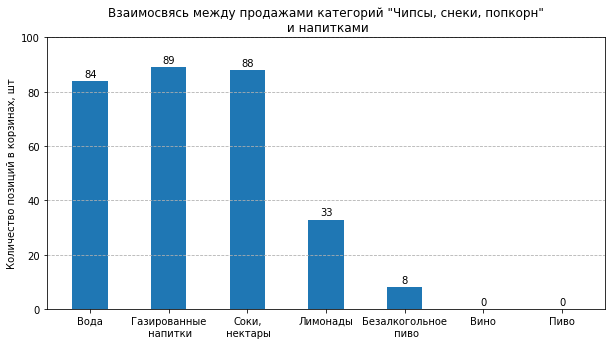

In [54]:
width = 0.45
fig, ax = plt.subplots()
x = np.arange(7)
ax.grid(axis='y', linestyle='--')

ax.bar(x, ser, width)

fig.set_figwidth(10)
fig.set_figheight(5)
ax.set_ylabel('Количество позиций в корзинах, шт')
ax.set_xticks(x, ['Вода', 'Газированные\n напитки', 'Соки,\n нектары', 'Лимонады', 'Безалкогольное\n пиво', 'Вино', 'Пиво'])
ax.set_title('Взаимосвясь между продажами категорий "Чипсы, снеки, попкорн"\n и напитками')

ax.set_ylim([0, 100])

for x, y in enumerate(ser.values):
    ax.text(x, y+1.5, round(y,1), horizontalalignment='center')

plt.show()